In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


## Load the dataset

In [38]:
df = pd.read_csv('../data/AB_NYC_2019.csv')



In [39]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##  Explore the data


In [40]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Clean the data


In [41]:
# Drop columns we won't use
df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)

# Fill missing values
df['reviews_per_month'].fillna(0, inplace=True)

# Drop rows where price = 0 or less
df = df[df['price'] > 0]

# Remove price outliers
# Remove outliers
df = df[df['price'] > 10]
df = df[df['price'] < 1000]
df = df.reset_index(drop=True)


 ## Visualize key relationships

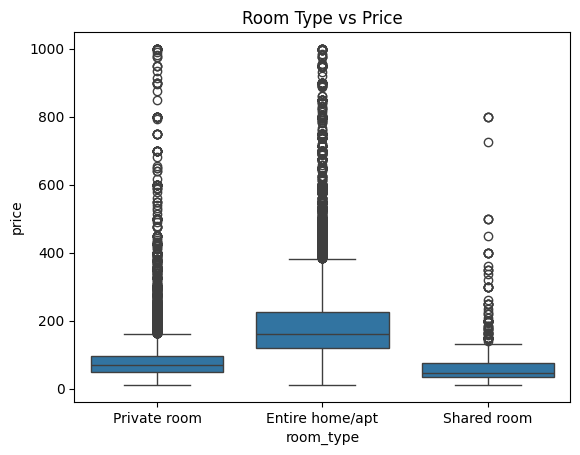

In [42]:
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Room Type vs Price")
plt.show()


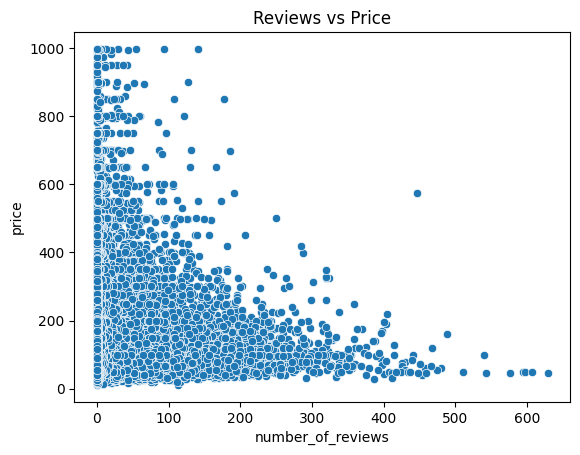

In [43]:
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title("Reviews vs Price")
plt.show()


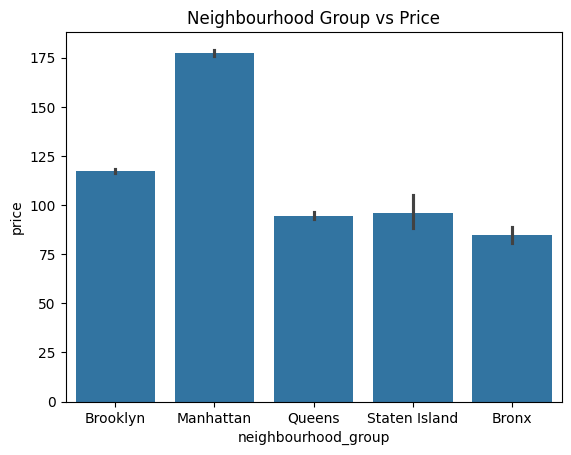

In [44]:
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title("Neighbourhood Group vs Price")
plt.show()


## Convert categorical columns

In [45]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)


In [46]:
df = df.drop('neighbourhood', axis=1)


## Train-test split

In [47]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Train a model

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate Your Model

Let’s check how good your model is at predicting Airbnb prices.

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("📉 Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, y_pred), 2))
print("📏 Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("📊 R² Score:", round(r2_score(y_test, y_pred), 2))


📉 Mean Absolute Error (MAE): 56.03
📏 Root Mean Squared Error (RMSE): 93.39
📊 R² Score: 0.32


## Visualize Predicted vs Actual Prices

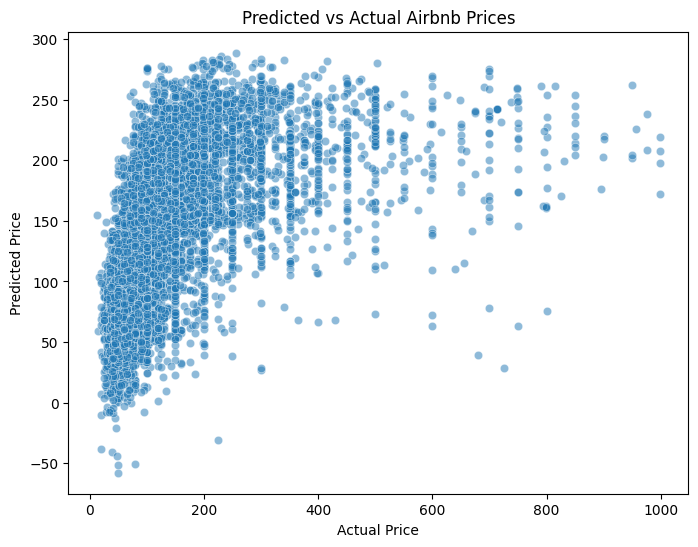

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Airbnb Prices")
plt.show()


## Save Your Model

In [51]:
import joblib
joblib.dump(model, '../models/price_model.pkl')


['../models/price_model.pkl']

## Prepare Columns for Streamlit App

In [52]:
joblib.dump(X.columns.tolist(), '../models/model_columns.pkl')


['../models/model_columns.pkl']

## Feature Importance

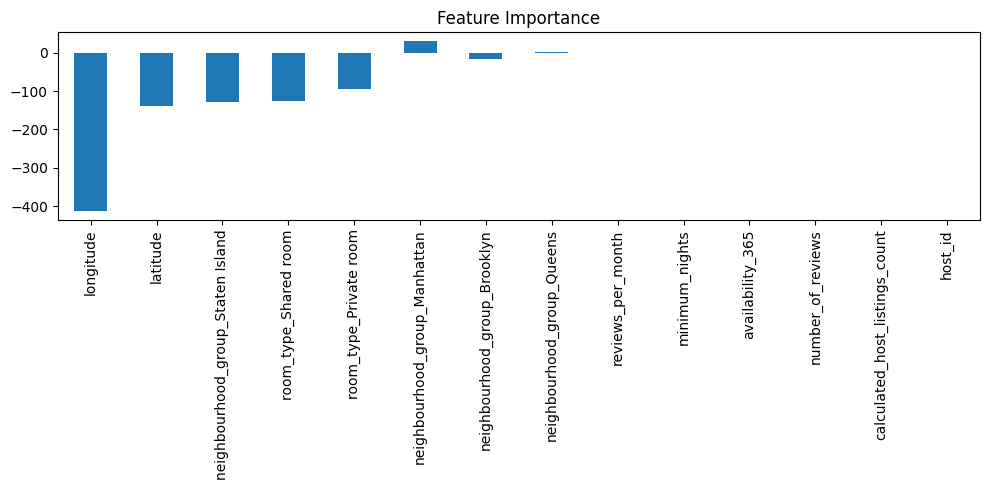

In [53]:
importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
importance.plot(kind='bar', figsize=(10, 5), title='Feature Importance')
plt.tight_layout()
plt.show()
